In [50]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [2]:
dataset = pd.read_csv('Energy Stastics/all_energy_statistics.csv').sample(2000, replace = True)
dataset.head(10)

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
931184,Austria,Other liquid biofuels - Transformation in CHP ...,2014,"Metric tons, thousand",0.00,NaN,other_liquid_biofuels
882480,Kazakhstan,Other bituminous coal - Transformation in elec...,1994,"Metric tons, thousand",51680.00,NaN,other_bituminous_coal
53541,Slovenia,Biogases - Transformation in CHP plants - auto...,2008,Terajoules,210.00,NaN,biogases
558881,Slovenia,Heat - Own use by coal mines,2004,Terajoules,84.00,NaN,heat
962152,Spain,Vegetal waste - Final consumption,2001,Terajoules,23704.00,1.0,other_vegetal_material_and_residues
610396,Slovakia,"Lignite - Consumption by agriculture, forestry...",2011,"Metric tons, thousand",2.00,NaN,lignite
1105036,Honduras,Electricity - Gross production,2008,"Kilowatt-hours, million",6549.00,NaN,total_electricity
465468,Malaysia,Gas Oil/ Diesel Oil - Total energy supply,2007,"Metric tons, thousand",9319.51,NaN,gas_oil_diesel_oil
235948,Costa Rica,Electricity - total net installed capacity of ...,2014,"Kilowatts, thousand",246.00,NaN,electricity_net_installed_capacity_of_electric...
835248,Belarus,Natural gas (including LNG) - total resources,2005,Terajoules,117063.00,NaN,natural_gas_including_lng


In [3]:
#dataset['quantity'].max()

In [4]:
dataset['quantity'].describe()

count    2.000000e+03
mean     6.098829e+04
std      1.544943e+06
min     -4.260000e+02
25%      1.400000e+01
50%      2.025000e+02
75%      2.313250e+03
max      6.465000e+07
Name: quantity, dtype: float64

In [72]:
dataset = dataset.sample(2000, replace=True, random_state=9)

<AxesSubplot:>

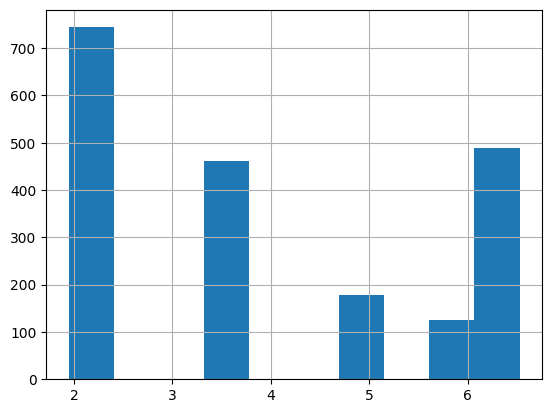

In [82]:
np.log(dataset['quantity']).hist()

In [83]:
mean = dataset['quantity'].mean()
std = dataset['quantity'].std()
lower_limit_1 = mean - (1*std)
upper_limit_1 = mean + (1*std)

lower_limit_2 = mean - (2*std)
upper_limit_2 = mean + (2*std)

lower_limit_3 = mean - (3*std)
upper_limit_3 = mean + (3*std)

In [84]:
((dataset['quantity'] >= lower_limit_1) & (dataset['quantity'] <= upper_limit_1)).mean()

0.7555

In [85]:
((dataset['quantity'] >= lower_limit_2) & (dataset['quantity'] <= upper_limit_2)).mean()

1.0

In [86]:
((dataset['quantity'] >= lower_limit_3) & (dataset['quantity'] <= upper_limit_3)).mean()

1.0

In [87]:
dataset['Z_score'] = stats.zscore(dataset['quantity'], axis=0)
dataset.head(5) 

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,Z_score
317548,Guinea-Bissau,Fuel oil - Total energy supply,2008,"Metric tons, thousand",27.75,1.0,fuel_oil,-0.641329
1043157,Austria,Electricity - Consumption by construction,2004,"Kilowatt-hours, million",646.00,NaN,total_electricity,1.662963
317548,Guinea-Bissau,Fuel oil - Total energy supply,2008,"Metric tons, thousand",27.75,1.0,fuel_oil,-0.641329
300487,New Caledonia,Fuel oil - Imports,1991,"Metric tons, thousand",276.00,NaN,fuel_oil,0.283929
923995,Tunisia,Other kerosene - Stock changes,2010,"Metric tons, thousand",7.00,NaN,other_kerosene,-0.718667


In [88]:
dataset [(dataset['Z_score'] < -3) | ((dataset['Z_score'] > 3))]

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,Z_score
